# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [4]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import math

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [5]:
# check_amt = the amount for which we want to compute the z-score
# Replace `pass` with appropriate code
def z_score(check_amt):
    mu = 20
    sigma = 2
    n = 1
    z = (check_amt - mu) / (sigma/math.sqrt(n))
    #z = stats.zscore(check_amt)
    return z


### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [6]:
z_score(24)

2.0

The z-score is a statistical measurement that indicates where a value falls on a normal distribution in regards to the number of standard deviations from the mean.  This z-score of 2 signifies that the check amount of 24 dollars is 2 standard deviations away from the mean and falls just at the edge of the 95% confidence interval.

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [7]:
p_value = stats.norm.cdf(2.0)
p_value

0.9772498680518208

Based on this p_value of .977, there is a high probability of getting a check of the amount $24 and therefore this amount is not significantly greater than the mean.  It would be significantly different if the probability of this check was below 0.05%

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [10]:
mu = 20
sigma = 2
interval_1 = mu - (2*sigma)
interval_2 = mu + (2*sigma)
print(interval_1, interval_2)

16 24


The 95% confidence interval indicates is 2 standard deviations lower and higher than the mean check of 20, meaning that 95% of the time, the restaurant has a check between the amount of $16 and @24.

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

The central limit theorem states that by taking many random samples from a population, calcualting the mean for each sample and then plotting the means we will get a normal distribution, even if the population data isn't normally distributed.  With a large number of samples, this allows us to use the sampling distribution to estimate the mean of the population and also use the sample standard of deviation to calculate the standard error and determine the confidence intervals.  All of this makes it possible to makes inferences about a population from a sample.

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

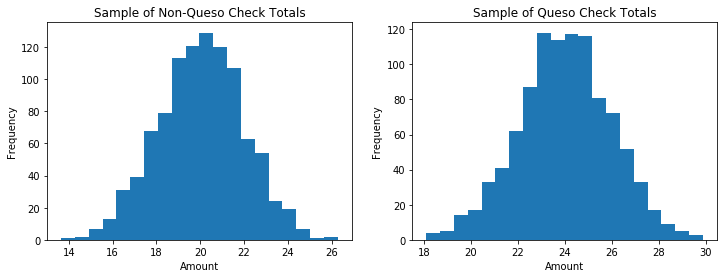

In [11]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

***Null Hypothesis***: there isn't a statistically significant difference between the amount of money spent by customers who order and do not order queso.

***Alternative Hypothesis***: there is a statistically signicant difference between the amount of money spent by customers who order queso and those who not order queso.

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

***Type 1 Error***: A type 1 error is a false positive, which means that we would reject the null hypothesis for the alternative hypothesis even though the null hypothesis is true.  It would indicate that we beleive there is a different in the amount of money spent on queso even though there isn't.  Based on a p_value of 0.05, there is still a 5% chance of a type 1 error even if we rejected null hypothesis with 95% confidence.

***Type 2 Error***: A type 2 error is a false negative, which means that we would fail to reject the null hypothesis even though th  alternative hypothesis is true.  It would indicate that we believe there isn't a different in the amount of money spent even though there is a statistically significant difference that we didn't detect.

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [14]:
t = stats.ttest_ind(no_queso, queso)
t

Ttest_indResult(statistic=-45.16857748646329, pvalue=1.29670967092511e-307)

I believe the p-value with the mathematical notation of "e-" indicates that this a very small number, in which case it is lower than 0.05 alpha value and we can reject the null hypothesis.

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [20]:
pet_store = 0.2
pet_store_large = 0.1
pet_store_medium = 0.3
pet_store_small = 0.6

pound = 0.8
pound_large = 0.55
pound_medium = 0.35
pound_small = 0.1

p_small = ((pound * pound_small) + (pet_store * pet_store_small))/ (pound * ((pound_large + pound_medium + pound_small)) + (pet_store * (pet_store_large + pet_store_medium + pet_store_small)))

In [21]:
p_small

0.2

### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [22]:
p_large_petstore = (pet_store_large * pet_store)/ ((pound * pound_large) + (pet_store * pet_store_large))

In [23]:
p_large_petstore

0.043478260869565216

### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

In [43]:
small_pup_pound = pet_store * pet_store_small
small_pup_store = pound * pound_small
print(small_pup_pound)
print(small_pup_store)

0.12
0.08000000000000002


It is more likely that he went to the pound to get a small puppy

### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

In [ ]:
"""
Written answer here for the prior = The prior is that 
Written answer here for the posterior = The posterior is that he got a large puppy
Written answer here for the likelihood
"""

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [17]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [19]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

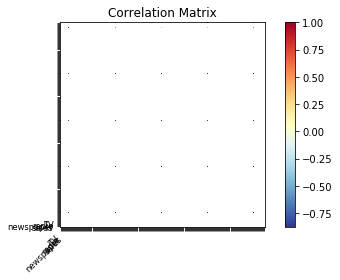

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.api as smg

corr_matrix = np.corrcoef(data)
smg.plot_corr(corr_matrix, xnames=data.columns)
plt.show()

### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

In [ ]:
"""
Written answer here
"""

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [40]:
import statsmodels.formula.api as smf
model = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        11:01:36   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

The R-squared is high, which means the independent variable has a statistically significant impact on the dependent variables.